<a href="https://colab.research.google.com/github/YuliAlvarezV/CasoEstudioHR/blob/main/Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carga de paquetes
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carga de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
manager = pd.read_csv("/content/drive/MyDrive/manager_survey.csv")
manager

,Unnamed: 0,EmployeeID,JobInvolvement,PerformanceRating,SurveyDate
0,0,1,3,3,2015-12-31
1,1,2,2,4,2015-12-31
2,2,3,3,3,2015-12-31
3,3,4,2,3,2015-12-31
4,4,5,3,3,2015-12-31
...,...,...,...,...,...
8815,4405,4406,3,3,2016-12-31
8816,4406,4407,2,3,2016-12-31
8817,4407,4408,3,4,2016-12-31
8818,4408,4409,2,3,2016-12-31


In [ ]:
#Identificamos número de filas y columnas
manager.shape

(8820, 5)

In [ ]:
# Volvemos el nombre de las columnas a minúscula
manager.columns = manager.columns.str.lower()

In [ ]:
#Eliminamos la columna Unnamed
manager = manager.drop("unnamed: 0", axis = 1)
manager.head(10)

,employeeid,jobinvolvement,performancerating,surveydate
0,1,3,3,2015-12-31
1,2,2,4,2015-12-31
2,3,3,3,2015-12-31
3,4,2,3,2015-12-31
4,5,3,3,2015-12-31
5,6,3,3,2015-12-31
6,7,3,4,2015-12-31
7,8,3,4,2015-12-31
8,9,3,4,2015-12-31
9,10,3,3,2015-12-31


In [ ]:
#Identificamos los tipos de columnas
manager.dtypes

employeeid            int64
jobinvolvement        int64
performancerating     int64
surveydate           object
dtype: object

In [ ]:
#Identificamos las variables según el diccionario
#jobinvolvement categorico
#performancerating categorico
#surveydate fecha

In [ ]:
#Convertimos al  tipo correcto
manager["surveydate"] = pd.to_datetime(manager["surveydate"])
manager["jobinvolvement"] = pd.Categorical(manager["jobinvolvement"])
manager["performancerating"] = pd.Categorical(manager["performancerating"])

In [ ]:
#Verificamos
manager.dtypes

employeeid                    int64
jobinvolvement                int64
performancerating             int64
surveydate           datetime64[ns]
dtype: object

In [ ]:
#Candidad de nulos por columna
manager.isnull().sum()

employeeid           0
jobinvolvement       0
performancerating    0
surveydate           0
dtype: int64

In [ ]:
#duplicados
manager.duplicated().sum()

0

#**Jobinvolvement**

In [ ]:
#Miramos cada categoria
manager["jobinvolvement"].value_counts()

3    5208
2    2250
4     864
1     498
Name: jobinvolvement, dtype: int64

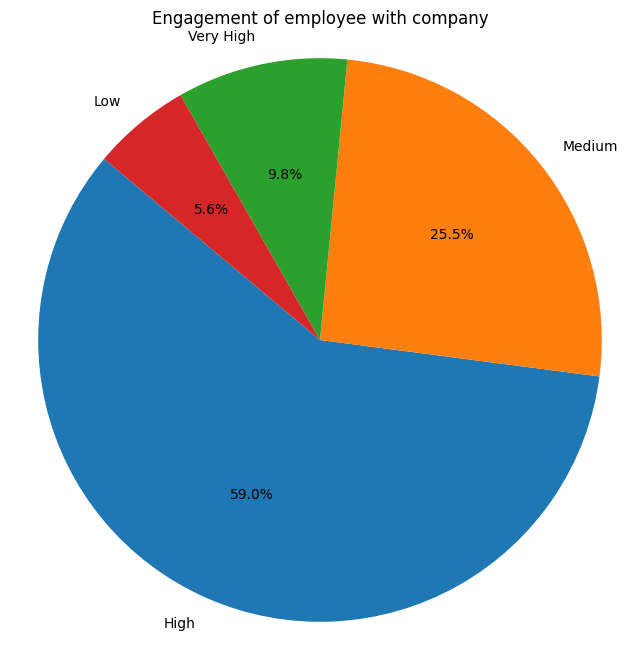

In [ ]:
#Gráfico de pastel
jobinvolvement = manager["jobinvolvement"].value_counts()

# Crear un diccionario de mapeo de valores originales a nuevos nombres
nuevos_nombres = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}

# Reemplazar los nombres de las etiquetas utilizando el diccionario de mapeo
jobinvolvement.index = jobinvolvement.index.map(nuevos_nombres)

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(jobinvolvement, labels= jobinvolvement.index, autopct='%1.1f%%', startangle=140)  # Crear gráfico de pastel
plt.axis('equal')  # Aspecto de círculo
plt.title("Engagement of employee with company")  # Título del gráfico
plt.show()  # Mostrar el gráfico

#**Performancerating**

In [ ]:
#Miramos cada categoria
manager["performancerating"].value_counts()

3    7464
4    1356
Name: performancerating, dtype: int64

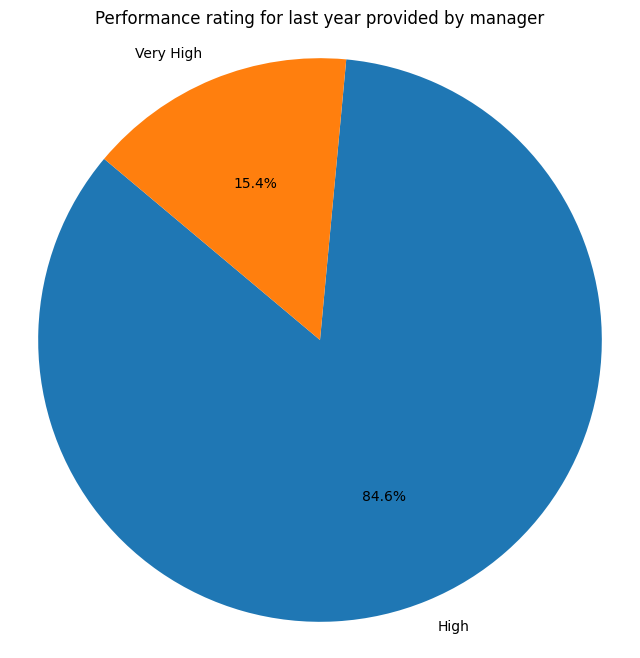

In [ ]:
#Gráfico de pastel
performancerating = manager["performancerating"].value_counts()

# Crear un diccionario de mapeo de valores originales a nuevos nombres
nuevos_nombres = {3: "High", 4: "Very High"}

# Reemplazar los nombres de las etiquetas utilizando el diccionario de mapeo
performancerating.index = performancerating.index.map(nuevos_nombres)

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(performancerating, labels= performancerating.index, autopct='%1.1f%%', startangle=140)  # Crear gráfico de pastel
plt.axis('equal')  # Aspecto de círculo
plt.title("Performance rating for last year provided by manager")  # Título del gráfico
plt.show()  # Mostrar el gráfico

#**Surveydate**

In [ ]:
#Compración de los resultados cada año
agrupado = manager.groupby(manager["surveydate"].dt.date)["jobinvolvement"].value_counts().reset_index(name='conteo')
agrupado

,surveydate,jobinvolvement,conteo
0,2015-12-31,3,2604
1,2015-12-31,2,1125
2,2015-12-31,4,432
3,2015-12-31,1,249
4,2016-12-31,3,2604
5,2016-12-31,2,1125
6,2016-12-31,4,432
7,2016-12-31,1,249
